# 서울특별시 공공자전거 이용정보(월별)

* 사용 데이터 : 서울특별시 공공자전거 이용정보(월별) (링크 넣어주세요)
* 데이터 측정 기간 : 2024년 07월 ~ 12월
* EDA : 탐색적 데이터 분석

## 1. 데이터 불러오기

In [557]:
import pandas as pd

bicyle = pd.read_csv("data/서울특별시 공공자전거 이용정보(월별)_24.7-12.csv", encoding="CP949") # encoding="utf-8"
bicyle

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...,...,...,...,...,...
619659,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,40대,55,2964.38,23.14,99803.49,1050
619660,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,50대,10,327.38,2.57,11073.52,183
619661,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,60대,1,14.37,0.13,558.26,3
619662,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,~10대,7,249.95,2.35,10151.09,80


In [558]:
print(bicyle.shape)

(619664, 11)


In [559]:
print(bicyle.columns)

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')


In [560]:
# 데이터 중에서도 수치형 데이터에 대한 결측치를 하고 싶다면 numpy를 이용해야 돼요!

## 2. 데이터 정보 확인하기

In [561]:
bicyle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.0+ MB


### 1) 데이터 형 변환

#### 데이터 형 변환을 해야되는 이유
#### int, float 타입으로 되어 있는 열은 `.describe()`라는 함수를 이용할 때 통계에 이용된다. 하지만 대여소번호와 같이 고유의 이름을 의미하는 경우에는 통계가 필요없기 때문에 object로 형 변환을 해줄 필요가 있다.

#### 대여일자를 datetime으로 바꾸지 않는 이유
#### ㄴ 우리가 분석하는 이 데이터는 일자별로 계속 측정된 게 아니라 **월별**로 집계된 데이터이기 때문에 이 데이터에서 대여일자는 카테고리라고 할 수 있다.

In [562]:
# 202407

#pd.to_datatime(bicycle["대여일자"], format="%Y%m")

In [563]:
# 대여일자, 대여소번호 
# .astype()
bicyle_alpha = bicyle.astype({"대여일자":"object", "대여소번호" : "object"})
bicyle_alpha

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...,...,...,...,...,...
619659,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,40대,55,2964.38,23.14,99803.49,1050
619660,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,50대,10,327.38,2.57,11073.52,183
619661,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,60대,1,14.37,0.13,558.26,3
619662,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,~10대,7,249.95,2.35,10151.09,80


In [564]:
bicyle_alpha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  object 
 1   대여소번호    619664 non-null  object 
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 52.0+ MB


### 2) 카테고리 변수 unique 확인하기

In [565]:
# .unique(), .nunique()
print(bicyle_alpha["성별"].unique())
print(bicyle_alpha["성별"].nunique())

[nan 'F' 'M' 'm' 'f']
4


In [566]:
# .unique(), .nunique()
print(bicyle_alpha["연령대코드"].unique())
print(bicyle_alpha["연령대코드"].nunique())

['20대' '30대' '40대' '50대' '60대' '기타' '~10대' '70대이상']
8


#### 성별에 결측치가 많다. -> 응답하지 않은 내용이기 때문이다. "O" 새로운 카테고리를 만들자.
#### 대문자, 소문자가 섞여 있다. -> 대문자로 통일

In [567]:
bicyle_alpha["성별"] = bicyle["성별"].str.upper()        # 대문자로 바꾸기
bicyle_alpha["성별"] = bicyle_alpha["성별"].fillna("O")  # 결측치 채우기
bicyle_alpha["성별"].unique()

array(['O', 'F', 'M'], dtype=object)

## 3. 결측치 확인하기

In [568]:
#전체 데이터에 대한 결측치 확인 
bicyle.isna() # bicyle.isnull() (O) isna 와 isnull은 동일!

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
619659,False,False,False,False,False,False,False,False,False,False,False
619660,False,False,False,False,False,False,False,False,False,False,False
619661,False,False,False,False,False,False,False,False,False,False,False
619662,False,False,False,False,False,False,False,False,False,False,False


In [569]:
bicyle_alpha.isna()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
619659,False,False,False,False,False,False,False,False,False,False,False
619660,False,False,False,False,False,False,False,False,False,False,False
619661,False,False,False,False,False,False,False,False,False,False,False
619662,False,False,False,False,False,False,False,False,False,False,False


In [570]:
# 각 행마다 결측치가 몇개 있는지 확인
bicyle_alpha.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
619659    0
619660    0
619661    0
619662    0
619663    0
Length: 619664, dtype: int64

In [571]:
# 각 열마다 결측치가 몇개 있는지 확인
not_be_bicycle_data = bicyle_alpha.isna().sum(axis=0)
not_be_bicycle_data

대여일자         0
대여소번호        0
대여소명         0
대여구분코드       0
성별           0
연령대코드        0
이용건수         0
운동량        395
탄소량        395
이동거리(M)      0
이용시간(분)      0
dtype: int64

In [572]:
# 성별의 결측치 개수만 추출
not_be_bicycle_data["성별"]

np.int64(0)

## 4. 데이터 탐색

### 1) 새로운 열 만들기

In [573]:
# 건당 이동거리(M), 건당 이용시간(분) 열을 추가
# 건당 이동거리(M) = 이동거리(M) / 이용건수
# 건당 이용시간(분) = 이용시간(분) / 이용건수
bicyle_alpha["건당 이동거리(M)"] = bicyle_alpha["이동거리(M)"] / bicyle_alpha["이용건수"]
bicyle_alpha["건당 이용시간(분)"] = bicyle_alpha["이용시간(분)"] / bicyle_alpha["이용건수"]

bicyle_alpha.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000


### 2) 데이터 요약하기

In [574]:
bicyle_alpha.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
count,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000,619664.000000,619664.000000
mean,36.207324,2171.806347,18.868742,8.161182e+04,741.158513,2701.308303,24.522191
std,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371,2035.965154,17.922810
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,221.250000,2.010000,8.705685e+03,81.000000,1504.471840,13.866667
50%,12.000000,773.460000,6.950000,3.007392e+04,274.000000,2138.456549,20.300000
75%,39.000000,2391.900000,21.140000,9.141029e+04,827.000000,3235.145285,30.000000
max,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000,74198.100000,863.000000


### 3) 시각화

In [575]:
# 대여가 가장 많았던 월자
## 목표: 대여일자에 따른 카운트 세기
## 판다스: .value_counts()를 통해 대여일자의 빈도표 출력해보기
## 시각화: sns.countplot을 이용하여 대여일자에 대한 막대그래프 그려보기

# 성별이 남자인 사람의 평균 이동거리, 평균 이용시간
## 목표: 데이터 요약 
## 성별이 남자인 데이터 출력하기 data_m
## data_m에서 평균 이동거리, 평균 이용시간 추출한 후 .mean() 사용해보기

## Hint: new_data.groupby(그룹화할열)[계산할 열].sum() : 000별 카운트 합계
## Hint: new_data.groupby(그룹화할열)[계산할 열].mean() : 000별 평균
## 시각화: sns.countplot()의 hue 옵션 이용해보기

# 연령대별 이용건수
# 대여소별 이용건수
# 대여일자별 대여수
# 월별 어느 연력대가 가장 많이 이용했는가
# 각 대여소별 평균 이동거리를 분석하여 용도 추론
# 대여소별 이용자연령대
# 대여소별 이용건수
# 연령대별 이용건수가 많은 상위 대여소 리스트
# 대여소별 건당 이용시간 평균
# 수거 용이 시간 분석

# Hint : groupby(), pivot_table(), crosstab()

#### 이전 코드 복습해보기

대여일자
202410    108791
202409    107191
202411    103677
202407    103502
202408    103316
202412     93187
Name: count, dtype: int64
2024년 하반기 중가장 많은 대여를 한 월은 10월입니다.


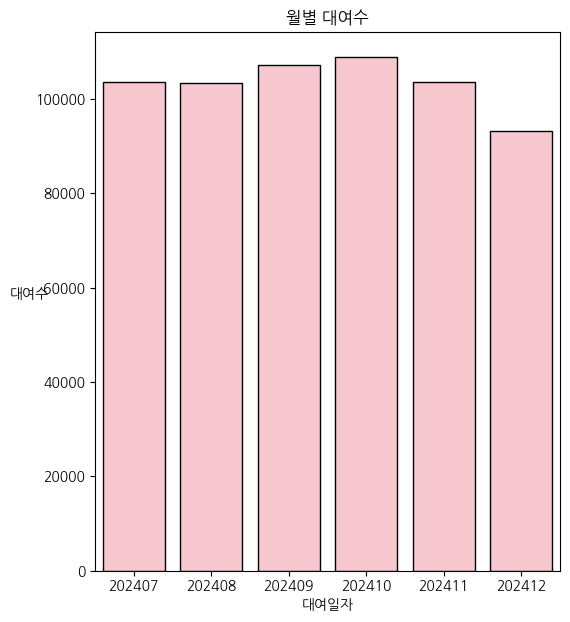

In [576]:
# 대여가 가장 많았던 월자
## 목표: 대여일자에 따른 카운트 세기
## 판다스: .value_counts()를 통해 대여일자의 빈도표 출력해보기
## 시각화: sns.countplot을 이용하여 대여일자에 대한 막대그래프 그려보기

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import koreanize_matplotlib
import platform

print(bicyle_alpha["대여일자"].value_counts()) # 인덱스를 정렬하고 싶을 때에는, sort_index / 값을 정렬할 때는, sort_values

plt.figure(figsize=(6, 7))
sns.countplot(data=bicyle_alpha, x="대여일자", color="pink", edgecolor="black")
plt.xlabel("대여일자")
plt.ylabel("대여수", rotation=0)
plt.title("월별 대여수")

print("2024년 하반기 중가장 많은 대여를 한 월은 10월입니다.")

In [577]:
## 목표: "대여일자"열만 가지고 개수를 구해보자
## 판다스: .value_counts()를 통해 대여일자의 빈도표 출력해보기
## 시각화: sns.countplot을 이용하여 대여일자에 대한 막대그래프 그려보기

# temp_data = new_data["대여일자"].value_counts().sort_index()
# temp_data

# import matplotlib.pyplot as plt
# import seaborn as sns
# import koreanize_matplotlib

# plt.figure(figsize=(3,3))
# temp_data.plot(kind="bar")
# plt.title("대여일자(월)별 대여소 개수 변화")
# plt.show()

# plt.figure(figsize=(7,3))
# sns.countplot(data=new_data, x="대여일자")
# plt.title("대여일자(월)별 대여소 개수 변화")
# plt.show()

##### 이 행은 대여소코드, 대여구분코드, 성별, 연령대코드별로 이용건수가 집계된 행이기 때문에 위의 시각화로는 의미를 도출하기가 힘들다.

In [578]:
# 성별이 남자인 사람의 평균 이동거리, 평균 이용시간
## 목표: 데이터 요약 
## 성별이 남자인 데이터 출력하기 data_m
## data_m에서 평균 이동거리, 평균 이용시간 추출한 후 .mean() 사용해보기

## Hint: new_data.groupby(그룹화할열)[계산할 열].sum() : 000별 카운트 합계
## Hint: new_data.groupby(그룹화할열)[계산할 열].mean() : 000별 평균
## 시각화: sns.countplot()의 hue 옵션 이용해보기

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import koreanize_matplotlib
import platform

bicyle_beta = bicyle_alpha[bicyle_alpha["성별"] == "M"]
bicyle_beta[["이동거리(M)", "이용시간(분)"]].mean()

이동거리(M)    105159.953358
이용시간(분)       929.781992
dtype: float64

In [579]:
bicyle_alpha.groupby("성별")[["이동거리(M)", "이용시간(분)"]].mean()

,이동거리(M),이용시간(분)
성별,,
F,66747.306317,633.006691
M,105159.953358,929.781992
O,69788.506640,635.282014


In [580]:
bicyle_alpha.groupby("성별")["이동거리(M)"].agg(func=["min", "mean", "max"])

,min,mean,max
성별,,,
F,0.0,66747.306317,11543940.94
M,0.0,105159.953358,6575883.33
O,0.0,69788.506640,7194367.42


In [581]:
bicyle_alpha.groupby("성별")["이용시간(분)"].agg(func=["min", "mean", "max"])

,min,mean,max
성별,,,
F,0,633.006691,95970
M,0,929.781992,52108
O,0,635.282014,54915


In [582]:
# 연령대별 이용건수
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import koreanize_matplotlib
import platform

bicyle_alpha.groupby("연령대코드")[["이용건수"]].count()

,이용건수
연령대코드,
20대,97123
30대,95628
40대,91184
50대,82530
60대,59331
70대이상,25630
~10대,66756
기타,101482


In [583]:
# 대여소별 이용건수
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import koreanize_matplotlib
import platform

bicyle_alpha.groupby("대여소명")[["이용건수"]].count()

,이용건수
대여소명,
1001. 광진교 남단 사거리(천호공원 방면),243
1002. 해공공원(천호동),254
1003. 해공도서관앞,237
1004. 삼성광나루아파트 버스정류장,257
1006. 롯데캐슬 115동앞,190
...,...
992.북한산입구 정류장,195
993.은평뉴타운 은뜨락아파트앞,216
994.북한산생태공원입구(교통섬),190


In [584]:
# 연령대별 이동거리, 이용시간의 평균
# groupby() 사용

bicyle_alpha.groupby("연령대코드")[["건당 이동거리(M)", "건당 이용시간(분)"]].mean()

,건당 이동거리(M),건당 이용시간(분)
연령대코드,,
20대,2451.222047,21.016007
30대,2586.120784,22.738673
40대,2878.267933,26.427358
50대,2944.130292,26.260852
60대,2802.546744,26.851123
70대이상,2555.291328,26.713537
~10대,2446.854491,22.019562
기타,2837.790135,26.163822


### 4) 지도 시각화

`uv add folium`

In [585]:
import pandas as pd

map_api_data = pd.read_csv("data/공공자전거 대여소 정보(api수집).csv")
map_api_data.head(5)

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5


In [ ]:
# RENT_NO, RENT_ID_NM, STA_LAT, STA_LONG 열만 가지고 오기
map_api_data[["RENT_NO", "RENT_ID_NM", "STA_LAT", "STA_LONG"]]

,RENT_NO,RENT_ID_NM,STA_LAT,STA_LONG
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300
...,...,...,...,...
3165,722,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3166,723,723. SBS방송국,37.529163,126.872749
3167,724,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3168,725,725. 양강중학교앞 교차로,37.524334,126.850548


In [587]:
# [대여소번호, 대여소명, 위도, 경도]로 열 이름 바꾸기
map_api_data_alpha = map_api_data.rename(columns={
    "RENT_NO": "대여소번호",
    "RENT_ID_NM": "대여소명",
    "STA_LAT": "위도",
    "STA_LONG": "경도"
})
map_api_data_alpha[["대여소번호", "대여소명", "위도", "경도"]]

,대여소번호,대여소명,위도,경도
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300
...,...,...,...,...
3165,722,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3166,723,723. SBS방송국,37.529163,126.872749
3167,724,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3168,725,725. 양강중학교앞 교차로,37.524334,126.850548


In [588]:
# bicycle_alpha에서 대여소별로 이동거리(M), 이용시간(분), 이용건수의 합 구하기 summary_data
summary_data = bicyle_alpha.groupby("대여소번호")[[ "이동거리(M)", "이용시간(분)", "이용건수"]].sum()
summary_data

,이동거리(M),이용시간(분),이용건수
대여소번호,,,
102,50822412.50,557065,21419
103,49643541.22,512156,17499
104,27315294.62,291362,9754
105,14608836.63,155910,5212
106,57449685.75,514407,13585
...,...,...,...
6172,5833677.71,58757,2846
6173,3927515.63,31916,1909
6176,5570391.77,50118,2795


In [589]:
# summary_data에서 인덱스 리셋하기
summary_data.reset_index()

,대여소번호,이동거리(M),이용시간(분),이용건수
0,102,50822412.50,557065,21419
1,103,49643541.22,512156,17499
2,104,27315294.62,291362,9754
3,105,14608836.63,155910,5212
4,106,57449685.75,514407,13585
...,...,...,...,...
2780,6172,5833677.71,58757,2846
2781,6173,3927515.63,31916,1909
2782,6176,5570391.77,50118,2795
2783,6177,7618777.34,73520,7047


In [591]:
print(summary_data.columns)


Index(['이동거리(M)', '이용시간(분)', '이용건수'], dtype='object')


In [ ]:
# summary_data에서 이동거리가 많은 순으로 Top10 뽑기

In [ ]:
# summary_data에서 이용시간이 많은 순으로 Top10 뽑기

In [ ]:
# summary_data에서 이용건수가 많은 순으로 Top10 뽑기

In [592]:
# 지도 시각화
import folium
# 지도 출력하기
center = [37.565516, 126.978025] # 중심 위치
map = folium.Map(location=center, zoom_start=12)
map

In [ ]:
# 이동거리 Top10 표시하기
for i in range(len(data_d_top10)):
    temp = data_d_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="red"), popup=temp.name).add_to(map)
map

NameError: name 'data_d_top10' is not defined

In [ ]:
# 이용시간 Top10 표시하기

In [ ]:
# 이용건수 Top10 표시하기

## QnA 1. 넘파이로 결측치 구하기

In [ ]:
import numpy as np
import pandas as pd

bicyle = pd.read_csv("data/서울특별시 공공자전거 이용정보(월별)_24.7-12.csv", encoding="CP949") # encoding="utf-8"
bicyle
numeric_df = bicyle.select_dtypes(include=[np.number])
numeric_df

,대여일자,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,67,4304.28,40.87,176252.62,1895
1,202407,102,64,4142.09,38.92,167774.15,1498
2,202407,102,2,265.91,2.11,9098.64,64
3,202407,102,6,648.52,5.11,22048.26,149
4,202407,102,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...,...
619659,202412,6178,55,2964.38,23.14,99803.49,1050
619660,202412,6178,10,327.38,2.57,11073.52,183
619661,202412,6178,1,14.37,0.13,558.26,3
619662,202412,6178,7,249.95,2.35,10151.09,80


In [ ]:
np.isnan(numeric_df).sum()

대여일자         0
대여소번호        0
이용건수         0
운동량        395
탄소량        395
이동거리(M)      0
이용시간(분)      0
dtype: int64

In [ ]:
np.isnan(numeric_df).sum().sum()

np.int64(790)

In [ ]:
nan_count = np.isnan(numeric_df).sum().sum()
print(f"숫자형에서 NaN 개수: {nan_count}")

숫자형에서 NaN 개수: 790


In [ ]:
# 번외

test_bicycle = bicyle.head(6)
test_bicycle

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6
5,202407,102,102. 망원역 1번출구 앞,일일권,NaN,기타,23,1922.74,19.53,84195.84,791


In [ ]:
# 평균 이동거리
# 이동거리(M)의 합 / 이용건수
test_bicycle["이동거리(M)"].sum() / test_bicycle["이용건수"].sum()

np.float64(2826.3968711656444)

In [ ]:
# 건당 이동거리
# 각 행 이동거리(M)의 합 / 이용건수

bicyle_alpha["건당 이동거리(M)"].mean()

np.float64(2701.308302585562)